In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(0)  # please do not remove this line
%matplotlib inline

In [6]:
def load_data_from_file(fileName="advertising.csv"):
    data = np.genfromtxt(fileName, dtype=None, delimiter=",", skip_header=1)
    features_X = data[:, :3]
    sales_Y = data[:, 3]

    # concatenate a column of ones to X
    ones = np.ones((len(features_X), 1))
    features_X = np.concatenate((ones, features_X), axis=1)

    return features_X, sales_Y

In [7]:
# Question 2
features_X, _ = load_data_from_file("data/advertising.csv")
print(features_X[:5, :])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [8]:
_, sales_Y = load_data_from_file("data/advertising.csv")
print(sales_Y.shape)

(200,)


In [11]:
def generate_random_value(bound=10):
    return (random.random() - 0.5) * bound


def create_individual(n=4, bound=10):
    individual = []
    for i in range(n):
        individual.append(generate_random_value(bound))
    return individual

In [12]:
individual = create_individual()
print(individual)

[0.1127472136860852, -0.9506586254958571, 2.837985890347726, -1.9668727392107255]


In [13]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.multiply((y_hat - sales_Y), (y_hat - sales_Y)).mean()
    return loss


def compute_fitness(individual):
    fitness = 1 / (1 + compute_loss(individual))
    return fitness

In [16]:
# question 4
features_X, sales_Y = load_data_from_file("data/advertising.csv")
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [19]:
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]

    return individual1_new, individual2_new

In [20]:
# question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


In [21]:
def mutate(individual, mutation_rate=0.05):
    individual_m = individual.copy()
    for i in range(len(individual_m)):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()

    return individual_m

In [22]:
# Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate=2.0)
print(before_individual == after_individual)

False


In [23]:
def initializePopulation(m):
    population = [create_individual() for _ in range(m)]
    return population

In [24]:
population = initializePopulation(100)
print(len(population))

100


In [26]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m - 1)
    while True:
        index2 = random.randint(0, m - 1)
        if index2 != index1:
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [29]:
population = initializePopulation(m=100)
individual_s = selection(population, m=100)
print(individual_s)

[-3.2310219315099364, 0.8368117604159697, -2.0395739093338348, 1.3442302526133143]


In [30]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen % 1 == 0:
        print(
            "Best loss:",
            compute_loss(sorted_population[m - 1]),
            "with chromsome: ",
            sorted_population[m - 1],
        )

    new_population = []
    while len(new_population) < m - elitism:
        # selection
        individual_s1 = selection(sorted_population, m)
        individual_s2 = selection(sorted_population, m)

        # crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)

        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)

        # copy elitism chromosomes that have best fitness score to the next generation
        new_population.append(individual_m1)
        new_population.append(individual_m2)

    for ind in sorted_population[m - elitism :]:
        new_population.append(ind)

    return new_population, compute_loss(sorted_population[m - 1])

In [31]:
# Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [35]:
def run_GA():
    n_generations = 100
    m = 600
    features_X, sales_Y = load_data_from_file("data/advertising.csv")
    population = initializePopulation(m)
    losses_list = []

    for i in range(n_generations):
        population, best_loss = create_new_population(population, elitism=2, gen=i)
        losses_list.append(best_loss)

    return losses_list

In [36]:
losses_list = run_GA()

Best loss: 886.6753130775364 with chromsome:  [-2.6399582372872086, 0.3187973807344602, -0.1244570675577561, -0.8852781983021174]
Best loss: 886.6753130775364 with chromsome:  [-2.6399582372872086, 0.3187973807344602, -0.1244570675577561, -0.8852781983021174]
Best loss: 886.6753130775364 with chromsome:  [-2.6399582372872086, 0.3187973807344602, -0.1244570675577561, -0.8852781983021174]
Best loss: 507.7621529426002 with chromsome:  [-3.977922650548227, -0.12317906764402031, 0.5050420934581057, 0.49636526034646966]
Best loss: 507.7621529426002 with chromsome:  [-3.977922650548227, -0.12317906764402031, 0.5050420934581057, 0.49636526034646966]
Best loss: 84.0553133069527 with chromsome:  [0.41754579012836857, 0.08415439091512655, -0.4034528457553177, 0.24122342291864163]
Best loss: 84.0553133069527 with chromsome:  [0.41754579012836857, 0.08415439091512655, -0.4034528457553177, 0.24122342291864163]
Best loss: 84.0553133069527 with chromsome:  [0.41754579012836857, 0.08415439091512655, -0

Best loss: 334.5015766424313 with chromsome:  [3.376880781254866, 0.2194593591153493, -0.19925308147752396, -0.4574435368666818]
Best loss: 334.5015766424313 with chromsome:  [3.376880781254866, 0.2194593591153493, -0.19925308147752396, -0.4574435368666818]
Best loss: 334.5015766424313 with chromsome:  [3.376880781254866, 0.2194593591153493, -0.19925308147752396, -0.4574435368666818]
Best loss: 119.35249001793972 with chromsome:  [3.7225099828896413, 0.06055223648842256, 0.1912878607591173, -0.334783598215993]
Best loss: 119.35249001793972 with chromsome:  [3.7225099828896413, 0.06055223648842256, 0.1912878607591173, -0.334783598215993]
Best loss: 81.97090563203851 with chromsome:  [-0.22757482849500188, 0.10335744272128022, 0.48486539103358317, -0.36525503802613546]
Best loss: 81.97090563203851 with chromsome:  [-0.22757482849500188, 0.10335744272128022, 0.48486539103358317, -0.36525503802613546]
Best loss: 63.01838197246567 with chromsome:  [0.4305677040327405, 0.10335744272128022, -

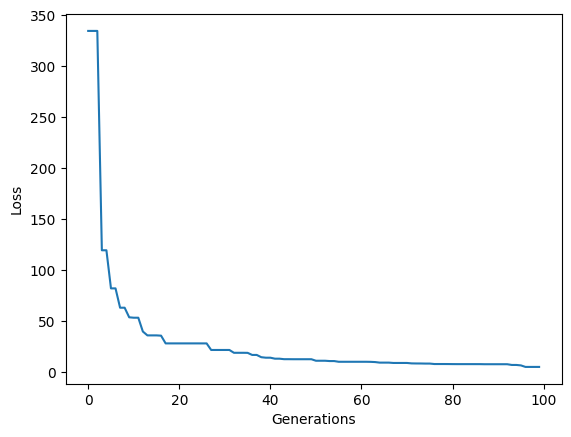

In [37]:
import matplotlib.pyplot as plt


def visualize_loss(losses_list):
    plt.plot(losses_list)
    plt.xlabel("Generations")
    plt.ylabel("Loss")
    plt.show()


losses_list = run_GA()
visualize_loss(losses_list)

[-1.6547196184772595, 0.06795122276368581, -0.4447519750069062, -0.20056727379538675]


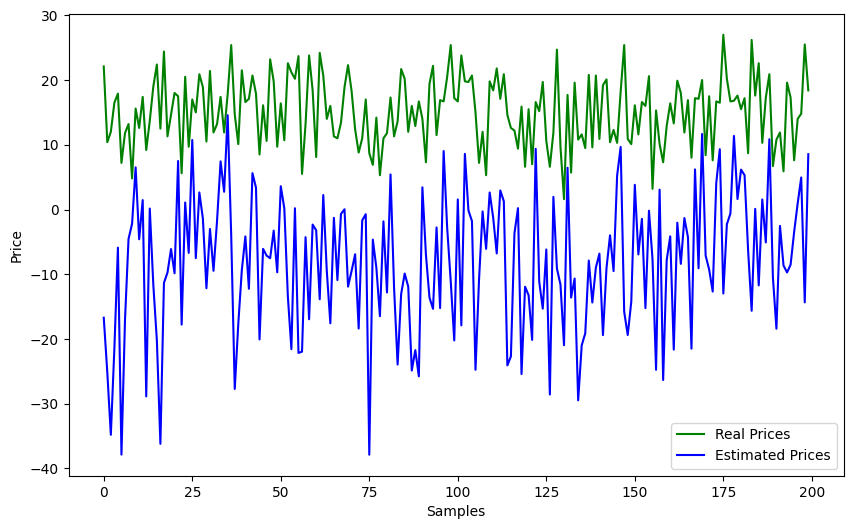

In [38]:
def visualize_predict_gt():
    # visualization of ground truth and predict value
    sorted_population = sorted(population, key=compute_fitness)
    print(sorted_population[-1])
    theta = np.array(sorted_population[-1])

    estimated_prices = []
    for feature in features_X:
        estimated_prices.append(feature.dot(theta))

    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel("Samples")
    plt.ylabel("Price")
    plt.plot(sales_Y, c="green", label="Real Prices")
    plt.plot(estimated_prices, c="blue", label="Estimated Prices")
    plt.legend()
    plt.show()


visualize_predict_gt()

[-1.6547196184772595, 0.06795122276368581, -0.4447519750069062, -0.20056727379538675]


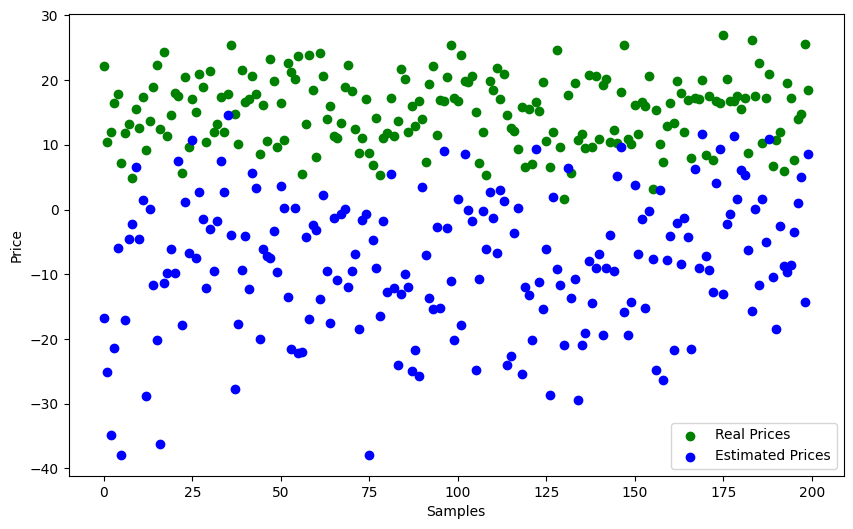

In [39]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c * x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(prices, c='green')
# plt.plot(estimated_prices, c='red')
plt.xlabel("Samples")
plt.ylabel("Price")
plt.scatter(samples, sales_Y, c="green", label="Real Prices")
plt.scatter(samples, estimated_prices, c="blue", label="Estimated Prices")
plt.legend()
plt.show()